___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [2]:
import os

# Set TF log level to ignore INFOs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

# Import Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [4]:
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [6]:
# Check the shape of the training and test data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [7]:
# # Check the number of unique labels and their distribution in the training set
# unique_labels, label_counts = np.unique(Y_train, return_counts=True)
# label_descriptions = ["T-shirt/top", 
#                       "Trouser", 
#                       "Pullover", 
#                       "Dress", 
#                       "Coat", 
#                       "Sandal", 
#                       "Shirt", 
#                       "Sneaker", 
#                       "Bag", 
#                       "Ankle boot"
#                      ]

In [8]:
# for label, count in zip(unique_labels, label_counts):
#     print(f"Class {label} ({label_descriptions[label]}): {count} samples")

Class 0 (T-shirt/top): 6000 samples
Class 1 (Trouser): 6000 samples
Class 2 (Pullover): 6000 samples
Class 3 (Dress): 6000 samples
Class 4 (Coat): 6000 samples
Class 5 (Sandal): 6000 samples
Class 6 (Shirt): 6000 samples
Class 7 (Sneaker): 6000 samples
Class 8 (Bag): 6000 samples
Class 9 (Ankle boot): 6000 samples


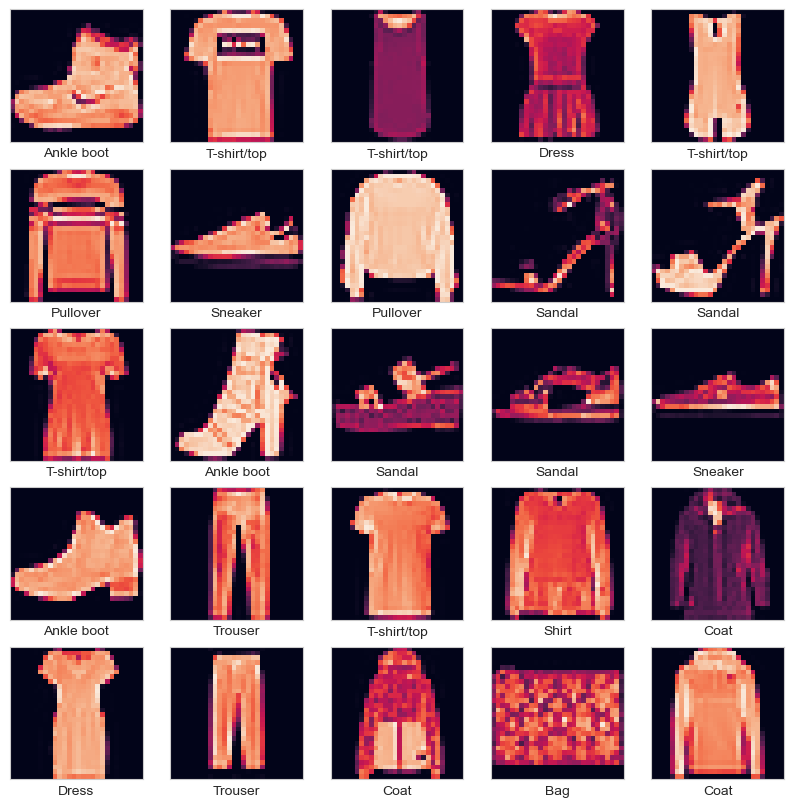

In [9]:
# # Visualize sample images from the training dataset
# plt.figure(figsize=(10, 10))
# for i in range(25):
#     plt.subplot(5, 5, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[i])
#     plt.xlabel(label_descriptions[Y_train[i]])
# plt.show()

In [10]:
classes=[
    "T-shirt/top", 
         "Trouser",
         "Pullover",
         "Dress",
         "Coat",
         "Sandal",
         "Shirt",
         "Sneaker",
         "Bag",
         "Ankle boot"
        ]

In [11]:
# Choose a random class
random_class = random.randint(0, len(classes) - 1)

In [12]:
# Find the first image in the training set that belongs to the selected class
class_label = classes[random_class]
index = next(i for i, label in enumerate(Y_train) if label == random_class)

In [13]:
# Get the image
image = X_train[index]

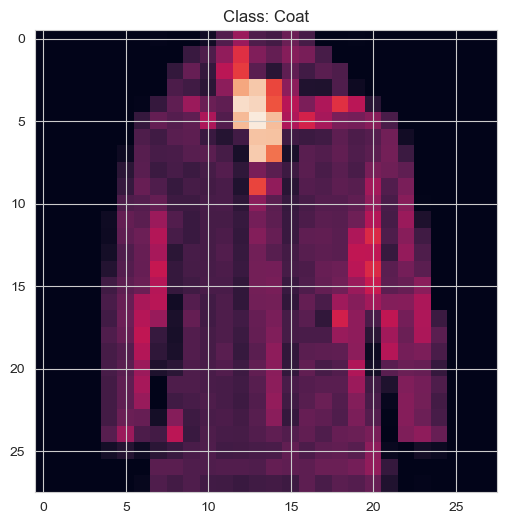

In [14]:
# Display the image and its label
plt.figure()
plt.imshow(image)
plt.title(f"Class: {class_label}")
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [15]:
X_train[5].min()

0

In [16]:
X_train[5].max()

255

In [17]:
X_test[5].min()

0

In [18]:
X_test[5].max()

255

In [19]:
# Normalize the X train and X test data by dividing by the max value (255)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
X_train[5].min()

0.0

In [21]:
X_train [5].max()

1.0

In [22]:
X_test [5].min()

0.0

In [23]:
X_test[5].max()

1.0

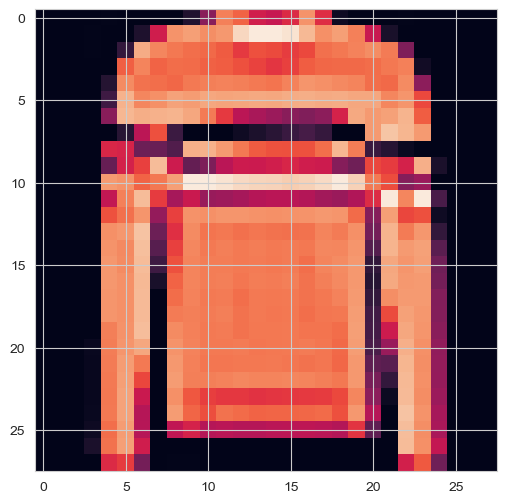

In [24]:
plt.imshow(X_train[5])
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [25]:
# Reshape the X arrays to include a 4th dimension for the single channel
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [26]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [27]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
# Convert y_train and y_test to one-hot encoded format
num_classes = 10  # Number of classes in Fashion MNIST
y_train = to_categorical(Y_train, num_classes)
y_test = to_categorical(Y_test, num_classes)

y_test.shape

(10000, 10)

In [30]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split

# # Define the seed value for reproducibility
# SEED = 42  # You can choose any integer value

# # Assuming you have X_train and Y_train data
# X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, random_state=SEED, shuffle=True)


In [ ]:
# print("X_train shape -> ", X_train.shape)
# print("y_train shape -> ", Y_train.shape)
# print("X_valid shape -> ", X_valid.shape)
# print("y_valid shape -> ", Y_valid.shape)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [32]:
# Create a Sequential model
model = Sequential()

# Add a 2D Convolutional Layer
model.add(
    Conv2D(
        filters=28, 
        kernel_size=(3, 3), 
        activation='relu', 
        input_shape=(28, 28, 1),
    )
)

# Add a Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), strides = (1,1)))

# Add a Flatten Layer
model.add(Flatten())

# Add a Dense Layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the final Dense Layer with 10 neurons for 10 classes and a softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [34]:
from tensorflow.keras.callbacks import EarlyStopping


In [35]:
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

In [ ]:
# tf.config.run_functions_eagerly(True)

In [36]:
# Train the model with early stopping
model.fit(
    X_train,  # X_train
    y_train,# y_train
    batch_size=64,
    epochs=15,      # You can adjust the number of epochs
    validation_split= 0.2,  # Split a portion of the training data for validation
    callbacks=[early_stopping]  # Include the early stopping callback
)


Epoch 1/15
750/750 [==============================] - 25s 33ms/step - loss: 0.4332 - accuracy: 0.8470 - val_loss: 0.3382 - val_accuracy: 0.8814
Epoch 2/15
750/750 [==============================] - 25s 34ms/step - loss: 0.2802 - accuracy: 0.8995 - val_loss: 0.2735 - val_accuracy: 0.9013
Epoch 3/15
750/750 [==============================] - 25s 34ms/step - loss: 0.2331 - accuracy: 0.9159 - val_loss: 0.2558 - val_accuracy: 0.9096
Epoch 4/15
750/750 [==============================] - 26s 34ms/step - loss: 0.1990 - accuracy: 0.9263 - val_loss: 0.2478 - val_accuracy: 0.9137
Epoch 5/15
750/750 [==============================] - 25s 34ms/step - loss: 0.1716 - accuracy: 0.9376 - val_loss: 0.2636 - val_accuracy: 0.9100
Epoch 6/15
750/750 [==============================] - 26s 34ms/step - loss: 0.1478 - accuracy: 0.9462 - val_loss: 0.2680 - val_accuracy: 0.9131
Epoch 7/15
750/750 [==============================] - 25s 34ms/step - loss: 0.1279 - accuracy: 0.9535 - val_loss: 0.2705 - val_accuracy:

**TASK 7: Plot values of metrics you used in your model.**

In [37]:
import matplotlib.pyplot as plt

In [38]:
model.metrics_names

['loss', 'accuracy']

In [40]:
summary = pd.DataFrame(model.history.history)
summary.head(9) #No. epochs

,loss,accuracy,val_loss,val_accuracy
0,0.433,0.847,0.338,0.881
1,0.280,0.900,0.273,0.901
2,0.233,0.916,0.256,0.910
3,0.199,0.926,0.248,0.914
4,0.172,0.938,0.264,0.910
5,0.148,0.946,0.268,0.913
6,0.128,0.953,0.270,0.914
7,0.111,0.960,0.276,0.914
8,0.096,0.966,0.280,0.918


<Axes: >

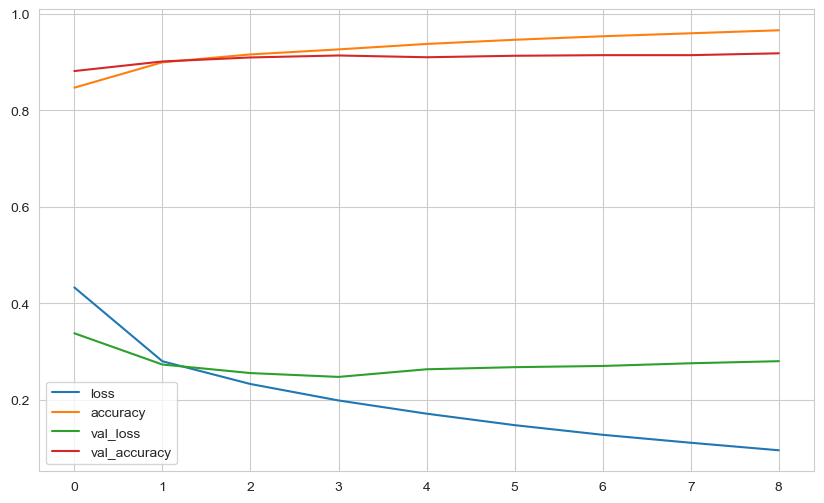

In [41]:
summary.plot()

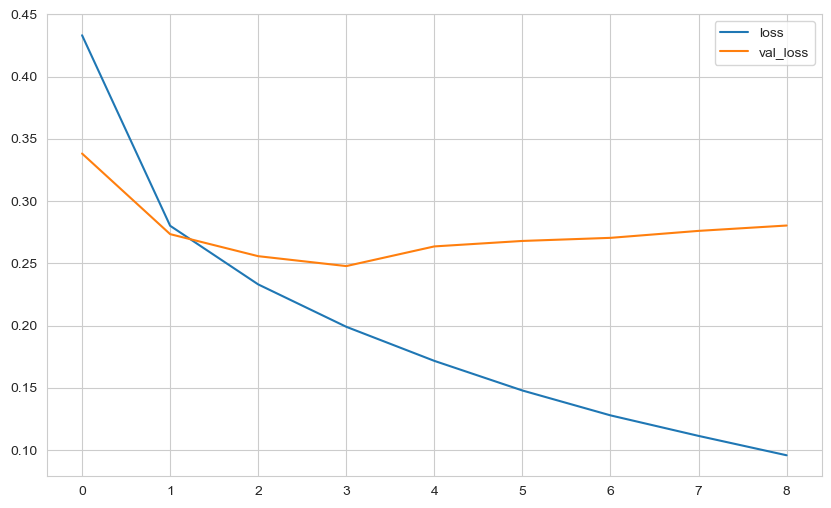

In [42]:
summary[["loss", "val_loss"]].plot()
plt.show()

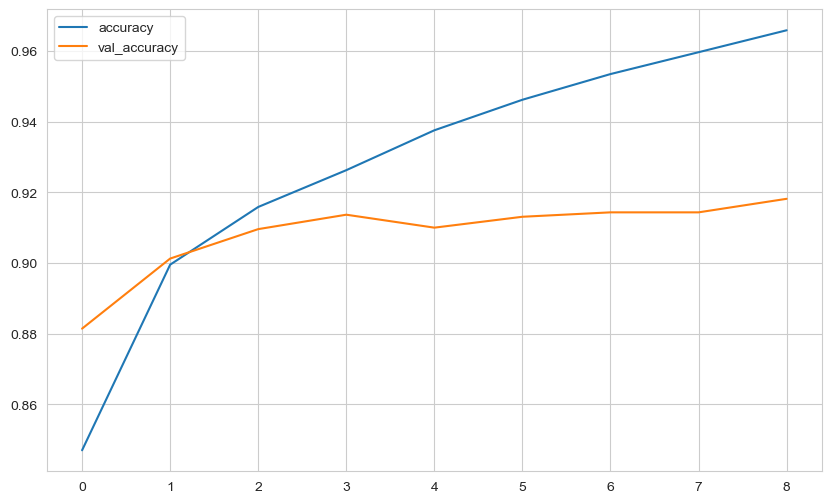

In [43]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

In [ ]:
# # Plot training and validation accuracy
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()

# # Plot training and validation loss
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()

# plt.tight_layout()
# plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [44]:
from sklearn.metrics import classification_report

In [45]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2610 - accuracy: 0.9095


[0.2610083520412445, 0.909500002861023]

In [46]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2610083520412445
Test accuracy: 0.909500002861023


In [47]:
# Predict labels on the test data
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)



313/313 [==============================] - 2s 5ms/step


In [48]:
y_pred.shape

(10000, 10)

In [49]:
y_pred_classes

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [54]:
# Convert one-hot encoded true labels to class labels
y_true = np.argmax(y_test, axis=1)

In [55]:
Y_pred = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 2s 5ms/step


In [53]:
# Generate a classification report
report = classification_report(y_true, y_pred_classes, target_names=classes)

# Print the classification report
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.90      0.87      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.85      0.85      0.85      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.87      0.85      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.78      0.73      0.75      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [58]:
from sklearn.metrics import confusion_matrix

#
print(confusion_matrix(y_true, Y_pred))

[[895   0  14   7   4   0  73   0   7   0]
 [  3 964   1  27   2   0   2   0   1   0]
 [ 22   0 853  10  56   0  59   0   0   0]
 [ 21   2   9 929  19   0  20   0   0   0]
 [  3   1  61  33 847   1  53   0   1   0]
 [  0   0   0   0   0 980   0  15   0   5]
 [118   0  71  28  48   0 731   0   4   0]
 [  0   0   0   0   0  12   0 976   0  12]
 [  5   0   0   7   1   2   4   5 976   0]
 [  0   0   0   0   0   5   1  50   0 944]]


<Axes: >

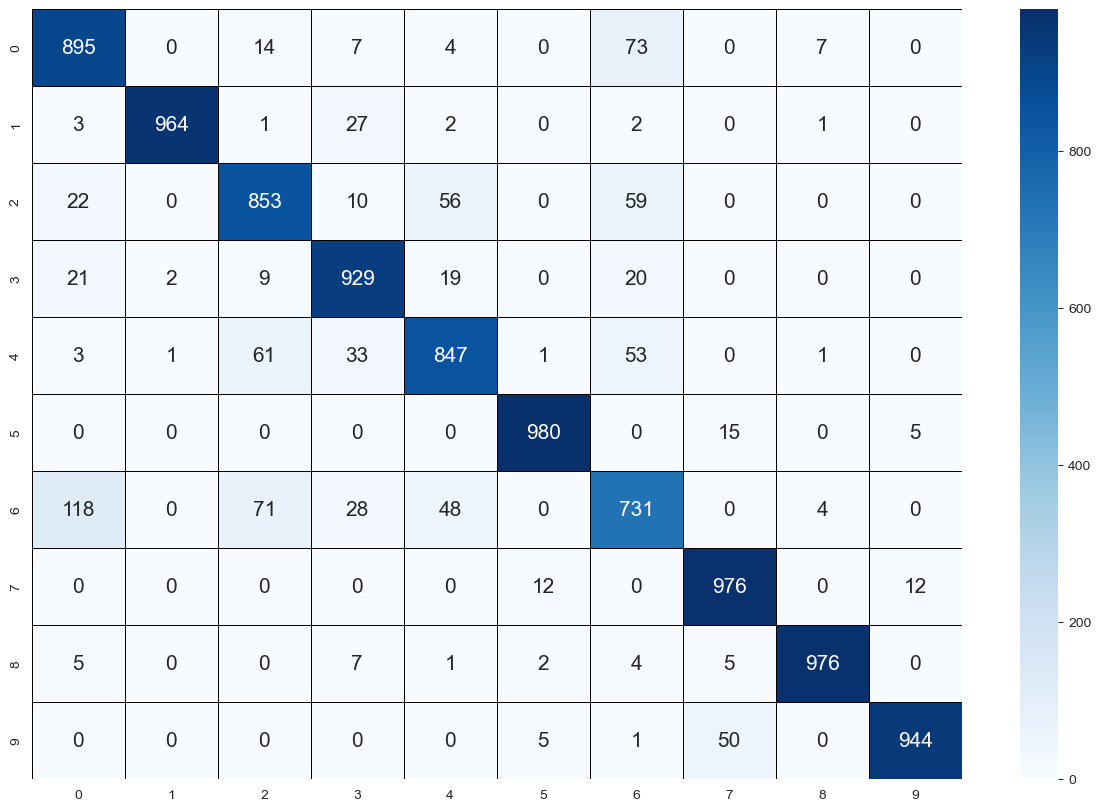

In [60]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_true, Y_pred), 
            annot=True, cmap="Blues", linewidth=0.5, linecolor="black",
            fmt="g", annot_kws={"size" : 15})


In [61]:
(y_true != Y_pred).sum()

905

## Prediction

In [63]:
from tensorflow.keras.models import load_model

model.save("cnn-1.h5")


In [64]:
model = tf.keras.models.load_model("cnn-1.h5")

In [65]:
pred = model.predict(np.expand_dims(X_test[24], axis=0))
np.argmax(pred)

1/1 [==============================] - 0s 40ms/step


1

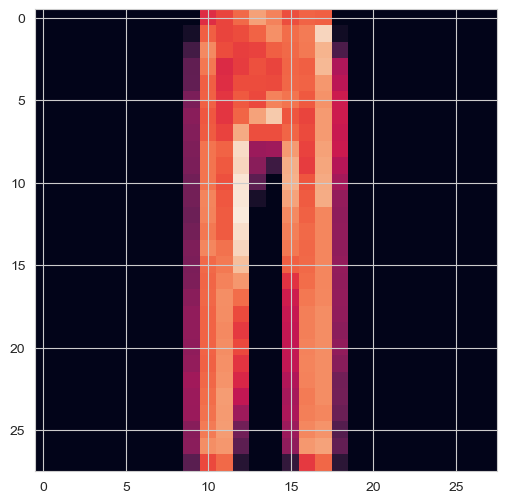

In [66]:
plt.imshow(X_test[24].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___